In [ ]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_excel('combined_data.xlsx')

In [ ]:
df = data.copy()
# Create 'Ad_ID' based on 'Campaign state'
df['Ad_ID'] = df['Campaign state'].apply(lambda x: 1 if x == 'Enabled' else 2)

# Sort the dataframe
df.sort_values(by=['Ad_ID', 'Week'], inplace=True)


# Dropping rows with NaN values due to shift operation
df.dropna(inplace=True)

# Extracting date-based features
df['Month'] = df['Week'].dt.month


# Selecting features and target variable
features = [ 'Budget', 'Month']
X = df[features]
y = df['Conversions']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df

,Campaign,Campaign state,Campaign type,Week,Clicks,Impr.,CTR,Currency code,Avg. CPC,Cost,Impr. (Abs. Top) %,Conversions,Cost / conv.,Conv. rate,Budget,Ad_ID,Month
0,All Courses,Enabled,Search,2022-10-17,360,2881,0.1250,GBP,1.29,464.06,0.4665,1.0,464.06,0.0028,65,1,10
1,All Courses,Enabled,Search,2022-10-24,485,3174,0.1528,GBP,0.94,457.97,0.4458,11.0,41.63,0.0227,65,1,10
2,All Courses,Enabled,Search,2022-10-31,500,4120,0.1214,GBP,0.92,460.76,0.4250,4.0,115.19,0.0080,65,1,10
3,All Courses,Enabled,Search,2022-11-07,508,3962,0.1282,GBP,0.95,481.64,0.4036,13.0,37.05,0.0256,65,1,11
4,All Courses,Enabled,Search,2022-11-14,413,2802,0.1474,GBP,1.04,431.26,0.3876,3.0,143.75,0.0073,65,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,All Courses,Enabled,Search,2024-04-22,557,17464,0.0319,GBP,0.73,405.20,0.2875,18.0,22.51,0.0323,60,1,4
80,All Courses,Enabled,Search,2024-04-29,503,13508,0.0372,GBP,0.81,408.90,0.2913,14.0,29.21,0.0278,60,1,4
81,All Courses,Enabled,Search,2024-05-06,568,16831,0.0337,GBP,0.75,426.81,0.2813,15.0,28.45,0.0264,60,1,5
82,All Courses,Enabled,Search,2024-05-13,405,8866,0.0457,GBP,1.04,419.42,0.2802,9.0,46.60,0.0222,60,1,5


# Machine learning



##Linear regression

Budget vs Conversion

In [ ]:
# Define the model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
predictions = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R^2: {r2}')

MSE: 131.179219312118, MAE: 9.32236039433214, RMSE: 11.453349698324853, R^2: 0.03540369847117064


##Random forest

In [ ]:
# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R^2: {r2}')


MSE: 55.896252227693935, MAE: 6.027027883080971, RMSE: 7.476379620357298, R^2: 0.5889797297857877


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model_conversions = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_conversions.fit(X_train, y_train)
predictions_conversions = gb_model_conversions.predict(X_test)

mse_conversions = mean_squared_error(y_test, predictions_conversions)
mae_conversions = mean_absolute_error(y_test, predictions_conversions)
rmse_conversions = np.sqrt(mse_conversions)
r2_conversions = r2_score(y_test, predictions_conversions)

print(f'MSE: {mse_conversions}, MAE: {mae_conversions}, RMSE: {rmse_conversions}, R^2: {r2_conversions}')



MSE: 54.8827875328362, MAE: 5.997092986009074, RMSE: 7.408291809373885, R^2: 0.5964320099679393


Hierarchical Bayesian model

In [ ]:
from cmdstanpy import install_cmdstan

# Install the latest version of CmdStan
install_cmdstan()


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


CmdStan install directory: /root/.cmdstan
CmdStan version 2.35.0 already installed
Test model compilation


True

Budget vs Conversion

In [ ]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Add a small random noise to the budget to avoid identical values
df['Budget'] = df['Budget'] + np.random.normal(0, 0.1, len(df))

# Standardize the budget variable for better convergence
budget_mean = df['Budget'].mean()
budget_std = df['Budget'].std()
df['Budget_standardized'] = (df['Budget'] - budget_mean) / budget_std

# Prepare the data dictionary for Stan
data = {
    'N': len(df),
    'Budget': df['Budget_standardized'].values,
    'Conversions': df['Conversions'].values,
    'N_new': 7,
    'new_Budget': (np.array([50, 75, 100, 125, 150, 175, 200]) - budget_mean) / budget_std
}

# Define and write the Stan model
stan_code = """
data {
  int<lower=0> N;
  vector[N] Budget;
  vector[N] Conversions;
  int<lower=0> N_new;
  vector[N_new] new_Budget;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  Conversions ~ normal(alpha + beta * Budget, sigma);
}
generated quantities {
  vector[N_new] predicted_Conversions;
  for (i in 1:N_new) {
    predicted_Conversions[i] = normal_rng(alpha + beta * new_Budget[i], sigma);
  }
  vector[N] y_pred;
  for (i in 1:N) {
    y_pred[i] = normal_rng(alpha + beta * Budget[i], sigma);
  }
}
"""

# Write the Stan model code to a file
with open('model.stan', 'w') as f:
    f.write(stan_code)

# Compile the model
model = CmdStanModel(stan_file='model.stan')

# Fit the model
fit = model.sample(data=data)

# Summarize the results
print(fit.summary())

# Extract the samples
samples = fit.draws_pd()

# Extract y_pred samples
y_pred_samples = samples.filter(like='y_pred')

# Calculate the mean of y_pred samples for each data point
y_pred_means = y_pred_samples.mean(axis=0)

# Calculate R², MAE, and MSE
r2 = r2_score(df['Conversions'], y_pred_means)
mae = mean_absolute_error(df['Conversions'], y_pred_means)
mse = mean_squared_error(df['Conversions'], y_pred_means)

print(f'R²: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

DEBUG:cmdstanpy:Removing /content/model
13:58:28 - cmdstanpy - INFO - compiling stan file /content/model.stan to exe file /content/model
INFO:cmdstanpy:compiling stan file /content/model.stan to exe file /content/model
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=model.stan /content/model
cwd: /root/.cmdstan/cmdstan-2.35.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=model.stan --o=/content/model.hpp /content/model.stan

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignore

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model', 'id=1', 'random', 'seed=7599', 'data', 'file=/tmp/tmp5ja8uffe/x3dr38an.json', 'output', 'file=/tmp/tmp5ja8uffe/modeleji5_2jh/model-20240718135844_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model', 'id=2', 'random', 'seed=7599', 'data', 'file=/tmp/tmp5ja8uffe/x3dr38an.json', 'output', 'file=/tmp/tmp5ja8uffe/modeleji5_2jh/model-20240718135844_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model', 'id=3', 'random', 'seed=7599', 'data', 'file=/tmp/tmp5ja8uffe/x3dr38an.json', 'output', 'file=/tmp/tmp5ja8uffe/modeleji5_2jh/model-20240718135844_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstan

13:58:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/model', 'id=1', 'random', 'seed=7599', 'data', 'file=/tmp/tmp5ja8uffe/x3dr38an.json', 'output', 'file=/tmp/tmp5ja8uffe/modeleji5_2jh/model-20240718135844_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp5ja8uffe/modeleji5_2jh/model-20240718135844_1.csv
 console_msgs (if any):
	/tmp/tmp5ja8uffe/modeleji5_2jh/model-20240718135844_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      


                               Mean      MCSE    StdDev         5%        50%  \
lp__                     -220.51600  0.030566  1.297580 -223.04600 -220.18200   
alpha                      17.39750  0.016547  0.978814   15.81690   17.41240   
beta                        1.58311  0.015543  0.966329    0.02946    1.56429   
sigma                       8.66198  0.011001  0.694912    7.57315    8.63197   
predicted_Conversions[1]   13.26420  0.141242  8.869160   -1.16281   13.17010   
...                             ...       ...       ...        ...        ...   
y_pred[80]                 17.75140  0.138439  8.722800    3.19125   17.76010   
y_pred[81]                 17.39920  0.138765  8.799630    2.98261   17.39510   
y_pred[82]                 17.82410  0.144966  8.723870    3.21122   17.94700   
y_pred[83]                 17.65500  0.138688  8.648990    3.43823   17.49620   
y_pred[84]                 17.52270  0.139270  8.847180    3.18013   17.49530   

                          

##Support Vector Machine (SVM) with AUC parameter selection

Conversions

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model and the hyperparameters to search
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_svr = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best MSE: 44.6928687851038


In [ ]:

# Predict on the test set
y_pred = best_svr.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 102.25484883136036
Mean absolute Error: 8.070067063681762
R^2 Score: 0.24809242261584252


Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential([
    Dense(128, input_dim=2),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=75, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Print model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [ ]:
# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/1000
5/5 [==============================] - 1s 56ms/step - loss: 264.3139 - mae: 13.8686 - val_loss: 155.5016 - val_mae: 10.2800 - lr: 0.0010
Epoch 2/1000
5/5 [==============================] - 0s 11ms/step - loss: 105.0581 - mae: 8.7497 - val_loss: 130.9978 - val_mae: 9.4489 - lr: 0.0010
Epoch 3/1000
5/5 [==============================] - 0s 14ms/step - loss: 99.9079 - mae: 8.4268 - val_loss: 131.5752 - val_mae: 9.4655 - lr: 0.0010
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 100.5712 - mae: 8.1547 - val_loss: 132.9621 - val_mae: 9.4784 - lr: 0.0010
Epoch 5/1000
5/5 [==============================] - 0s 10ms/step - loss: 73.5239 - mae: 7.0566 - val_loss: 144.7276 - val_mae: 9.7919 - lr: 0.0010
Epoch 6/1000
5/5 [==============================] - 0s 16ms/step - loss: 77.2260 - mae: 6.8584 - val_loss: 152.8749 - val_mae: 10.1952 - lr: 0.0010
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 83.1081 - mae: 7.3176 - val_loss: 151.7

1/1 [==============================] - 0s 33ms/step - loss: 130.9978 - mae: 9.4489
Test Loss: 130.997802734375
Test MAE: 9.448883056640625
1/1 [==============================] - 0s 95ms/step
R²: 0.03673767180135279
MSE: 130.99780706768047


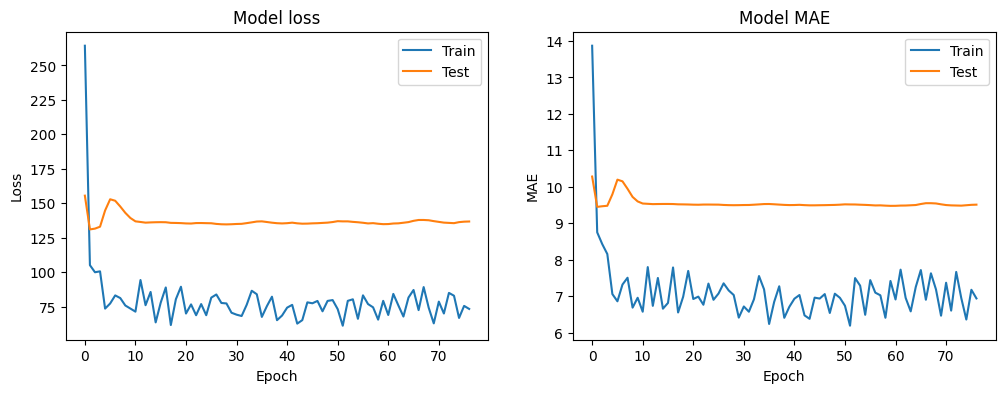

In [ ]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test MAE: {mae}')

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate additional metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'MSE: {mse}')

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

##Ensemble model

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
best_rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the model on the standardized data
best_rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = best_rf.predict(X_test_scaled)

# Calculate and print metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest with Standardized Data – MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')


Random Forest with Standardized Data – MSE: 55.23862014306931, MAE: 6.029275922296659, R²: 0.593815476483489


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)
dt_grid_search = dt.fit(X_train_scaled, y_train)

# Best Decision Tree model
best_dt = dt_grid_search

# Evaluate the best model on the test set
y_pred_dt = best_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree – MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')


Decision Tree – MSE: 54.19489821762037, MAE: 6.0196918767507, R²: 0.6014902462708984


In [ ]:
best_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
best_gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import BaggingRegressor

# Create a Bagging Regressor using the best Decision Tree Regressor
bagging_regressor = BaggingRegressor(base_estimator=best_gbr, n_estimators=1000, random_state=42)
bagging_regressor.fit(X_train_scaled, y_train)

# Evaluate the Bagging Regressor on the test set
y_pred_bagging = bagging_regressor.predict(X_test_scaled)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
print(f'Bagging Regressor – MSE: {mse_bagging}, MAE: {mae_bagging}, R²: {r2_bagging}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor – MSE: 55.7471953191685, MAE: 6.032427173927529, R²: 0.5900757855744629


In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

# Initialize the models
svr_model = SVR(kernel='rbf', C=1, gamma=0.1)
knn_model = KNeighborsRegressor(n_neighbors=5)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Combine models using Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('rf', best_rf),
        ('lr', lr_model),
        ('gbr', best_gbr),
        ('svr', svr_model),
        ('knn', knn_model),
        ('elastic_net', elastic_net_model)
    ],
    final_estimator=GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, random_state=42)
)

# Fit the Stacking Regressor
stacking_regressor.fit(X_train_scaled, y_train)

# Evaluate the Stacking Regressor on the test set
y_pred_stacking = stacking_regressor.predict(X_test_scaled)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
print(f'Stacking Regressor – MSE: {mse_stacking}, MAE: {mae_stacking}, R²: {r2_stacking}')


Stacking Regressor – MSE: 85.46906018476318, MAE: 7.614728811496857, R²: 0.37152286938673995


In [ ]:
from sklearn.ensemble import VotingRegressor

# Initialize the Voting Regressor with standardized data
voting_regressor = VotingRegressor(
    estimators=[
        ('rf', best_rf),
        ('dt', best_dt),
        ('lr', lr_model),
        ('gbr', best_gbr)
    ],
)

# Fit the model
voting_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_voting = voting_regressor.predict(X_test_scaled)

# Calculate and print metrics
mse_voting = mean_squared_error(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f'Voting Regressor with Standardized Data – MSE: {mse_voting}, MAE: {mae_voting}, R²: {r2_voting}')


Voting Regressor with Standardized Data – MSE: 65.4531720121174, MAE: 6.4174120841342095, R²: 0.518705112156538


## Prediction

In [ ]:
import numpy as np
import pandas as pd
# Define the function to make predictions and calculate statistics
def predict_and_calculate_statistics(budgets, model, X_train, y_train):
    # Prepare the input data for prediction
    months = list(range(1, 13))
    new_data = pd.DataFrame([(budget, month) for budget in budgets for month in months], columns=['Budget', 'Month'])
    X_new = new_data[['Budget', 'Month']].values

    # Train the Bagging Regressor model
    model.fit(X_train, y_train)

    # Get predictions
    ensemble_preds = model.predict(X_new)

    # Collect predictions from each base estimator
    base_preds = np.column_stack([est.predict(X_new) for est in model.estimators_])

    # Calculate mean and standard deviation of predictions
    pred_means = np.mean(base_preds, axis=1)

    # Calculate quantiles for 70% confidence intervals
    lower_quantile = 0.15  # 15th percentile for the lower bound of 70% CI
    upper_quantile = 0.85  # 85th percentile for the upper bound of 70% CI

    lower_70 = np.percentile(base_preds, lower_quantile * 100, axis=1)
    upper_70 = np.percentile(base_preds, upper_quantile * 100, axis=1)

    # Create a DataFrame to store results
    results = new_data.copy()
    results['Mean_Pred'] = pred_means
    results['Lower_70'] = lower_70
    results['Upper_70'] = upper_70

    # Calculate mean for each month and whole year
    monthly_means = results.groupby('Month')['Mean_Pred'].mean()
    yearly_mean = results['Mean_Pred'].mean()

    # Calculate conservative (lower 70%) and optimistic (upper 70%) estimations for each month and whole year
    monthly_conservative = results.groupby('Month')['Lower_70'].mean()
    monthly_optimistic = results.groupby('Month')['Upper_70'].mean()

    yearly_conservative = results['Lower_70'].mean()
    yearly_optimistic = results['Upper_70'].mean()

    # Print the results
    print("Monthly Means:")
    print(monthly_means)
    print("\nYearly Mean:")
    print(yearly_mean)

    print("\nMonthly Conservative Estimations (70% CI):")
    print(monthly_conservative)
    print("\nYearly Conservative Estimation (70% CI):")
    print(yearly_conservative)

    print("\nMonthly Optimistic Estimations (70% CI):")
    print(monthly_optimistic)
    print("\nYearly Optimistic Estimation (70% CI):")
    print(yearly_optimistic)

    return monthly_means, yearly_mean, monthly_conservative,yearly_conservative, monthly_optimistic, yearly_optimistic

budgets = [50]  # Define flexible budget levels here

# Call the function with the defined budgets and model
predict_and_calculate_statistics(budgets, voting_regressor, X_train, y_train)


Monthly Means:
Month
1      8.336620
2      7.826353
3      9.384635
4     10.129665
5      9.015381
6     10.471789
7      6.007279
8      7.275766
9      5.049203
10     2.275783
11     3.195327
12     2.351341
Name: Mean_Pred, dtype: float64

Yearly Mean:
6.776595179638396

Monthly Conservative Estimations (70% CI):
Month
1     8.027351
2     7.419492
3     8.378261
4     8.646642
5     7.715802
6     8.665554
7     1.505549
8     2.298327
9     1.592986
10   -0.340128
11    0.519237
12    0.018715
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
4.537315529898508

Monthly Optimistic Estimations (70% CI):
Month
1      8.670435
2      8.215850
3     10.403386
4     11.610108
5     10.416497
6     12.303352
7     10.607887
8     12.214674
9      8.479344
10     5.119272
11     6.017871
12     4.912863
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
9.080961565989305


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X 

(Month
 1      8.336620
 2      7.826353
 3      9.384635
 4     10.129665
 5      9.015381
 6     10.471789
 7      6.007279
 8      7.275766
 9      5.049203
 10     2.275783
 11     3.195327
 12     2.351341
 Name: Mean_Pred, dtype: float64,
 6.776595179638396,
 Month
 1     8.027351
 2     7.419492
 3     8.378261
 4     8.646642
 5     7.715802
 6     8.665554
 7     1.505549
 8     2.298327
 9     1.592986
 10   -0.340128
 11    0.519237
 12    0.018715
 Name: Lower_70, dtype: float64,
 4.537315529898508,
 Month
 1      8.670435
 2      8.215850
 3     10.403386
 4     11.610108
 5     10.416497
 6     12.303352
 7     10.607887
 8     12.214674
 9      8.479344
 10     5.119272
 11     6.017871
 12     4.912863
 Name: Upper_70, dtype: float64,
 9.080961565989305)

In [ ]:

budgets = [100]  # Define flexible budget levels here

# Call the function with the defined budgets and model
predict_and_calculate_statistics(budgets, voting_regressor, X_train, y_train)

Monthly Means:
Month
1     10.868906
2     10.572691
3      9.581679
4      8.761910
5      7.471958
6      9.012240
7      9.205518
8     10.354615
9     10.032619
10     7.410857
11    10.678820
12    11.951815
Name: Mean_Pred, dtype: float64

Yearly Mean:
9.658635701786373

Monthly Conservative Estimations (70% CI):
Month
1      8.791901
2      8.712314
3      8.394861
4      7.848888
5      6.471874
6      7.960119
7      7.839754
8      7.941229
9      7.882740
10     7.360467
11    10.594633
12    11.884267
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
8.473587323405416

Monthly Optimistic Estimations (70% CI):
Month
1     12.852167
2     12.336231
3     10.678377
4      9.684826
5      8.469238
6     10.062212
7     10.628584
8     12.906386
9     12.308181
10     7.464250
11    10.764223
12    12.014545
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
10.84743497857793


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X 

(Month
 1     10.868906
 2     10.572691
 3      9.581679
 4      8.761910
 5      7.471958
 6      9.012240
 7      9.205518
 8     10.354615
 9     10.032619
 10     7.410857
 11    10.678820
 12    11.951815
 Name: Mean_Pred, dtype: float64,
 9.658635701786373,
 Month
 1      8.791901
 2      8.712314
 3      8.394861
 4      7.848888
 5      6.471874
 6      7.960119
 7      7.839754
 8      7.941229
 9      7.882740
 10     7.360467
 11    10.594633
 12    11.884267
 Name: Lower_70, dtype: float64,
 8.473587323405416,
 Month
 1     12.852167
 2     12.336231
 3     10.678377
 4      9.684826
 5      8.469238
 6     10.062212
 7     10.628584
 8     12.906386
 9     12.308181
 10     7.464250
 11    10.764223
 12    12.014545
 Name: Upper_70, dtype: float64,
 10.84743497857793)

In [ ]:

budgets = [150]  # Define flexible budget levels here

# Call the function with the defined budgets and model
predict_and_calculate_statistics(budgets, voting_regressor, X_train, y_train)

Monthly Means:
Month
1     10.868906
2     10.572691
3      9.581679
4      8.761910
5      7.471958
6      9.012240
7      9.205518
8     10.354615
9     10.032619
10     7.410857
11    10.678820
12    11.951815
Name: Mean_Pred, dtype: float64

Yearly Mean:
9.658635701786373

Monthly Conservative Estimations (70% CI):
Month
1      8.791901
2      8.712314
3      8.394861
4      7.848888
5      6.471874
6      7.960119
7      7.839754
8      7.941229
9      7.882740
10     7.360467
11    10.594633
12    11.884267
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
8.473587323405416

Monthly Optimistic Estimations (70% CI):
Month
1     12.852167
2     12.336231
3     10.678377
4      9.684826
5      8.469238
6     10.062212
7     10.628584
8     12.906386
9     12.308181
10     7.464250
11    10.764223
12    12.014545
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
10.84743497857793


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X 

(Month
 1     10.868906
 2     10.572691
 3      9.581679
 4      8.761910
 5      7.471958
 6      9.012240
 7      9.205518
 8     10.354615
 9     10.032619
 10     7.410857
 11    10.678820
 12    11.951815
 Name: Mean_Pred, dtype: float64,
 9.658635701786373,
 Month
 1      8.791901
 2      8.712314
 3      8.394861
 4      7.848888
 5      6.471874
 6      7.960119
 7      7.839754
 8      7.941229
 9      7.882740
 10     7.360467
 11    10.594633
 12    11.884267
 Name: Lower_70, dtype: float64,
 8.473587323405416,
 Month
 1     12.852167
 2     12.336231
 3     10.678377
 4      9.684826
 5      8.469238
 6     10.062212
 7     10.628584
 8     12.906386
 9     12.308181
 10     7.464250
 11    10.764223
 12    12.014545
 Name: Upper_70, dtype: float64,
 10.84743497857793)

In [ ]:

budgets = [200]  # Define flexible budget levels here

# Call the function with the defined budgets and model
predict_and_calculate_statistics(budgets, bagging_regressor, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


Monthly Means:
Month
1     14.188410
2     13.500808
3     11.644824
4      9.912493
5      7.595374
6     10.658914
7     11.145742
8     13.404122
9     12.705402
10     8.002228
11    10.681145
12    12.139316
Name: Mean_Pred, dtype: float64

Yearly Mean:
11.29823172849475

Monthly Conservative Estimations (70% CI):
Month
1     9.642580
2     9.087607
3     7.610512
4     5.891660
5     3.811399
6     6.427722
7     7.031484
8     8.234104
9     7.933838
10    4.128693
11    9.203203
12    6.095583
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
7.091532129682897

Monthly Optimistic Estimations (70% CI):
Month
1     18.850190
2     18.060383
3     16.014107
4     14.106308
5     11.309035
6     14.772132
7     15.177398
8     18.642267
9     17.867546
10    11.025165
11    12.184913
12    17.950040
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
15.496623645318989


(Month
 1     14.188410
 2     13.500808
 3     11.644824
 4      9.912493
 5      7.595374
 6     10.658914
 7     11.145742
 8     13.404122
 9     12.705402
 10     8.002228
 11    10.681145
 12    12.139316
 Name: Mean_Pred, dtype: float64,
 11.29823172849475,
 Month
 1     9.642580
 2     9.087607
 3     7.610512
 4     5.891660
 5     3.811399
 6     6.427722
 7     7.031484
 8     8.234104
 9     7.933838
 10    4.128693
 11    9.203203
 12    6.095583
 Name: Lower_70, dtype: float64,
 7.091532129682897,
 Month
 1     18.850190
 2     18.060383
 3     16.014107
 4     14.106308
 5     11.309035
 6     14.772132
 7     15.177398
 8     18.642267
 9     17.867546
 10    11.025165
 11    12.184913
 12    17.950040
 Name: Upper_70, dtype: float64,
 15.496623645318989)

In [ ]:
import pandas as pd

# Prepare DataFrames for each budget level
budgets = [50, 75, 100, 125, 150, 175, 200]

# Dictionary to store DataFrames for each budget
dfs = {}

for budget in budgets:
    # Assuming the predict_and_calculate_statistics function returns monthly means and yearly values
    monthly_means, yearly_mean, lower_70, yearly_lower_70, upper_70, yearly_upper_70 = predict_and_calculate_statistics([budget], voting_regressor, X_train, y_train)

    # Creating a DataFrame for the budget level
    df = pd.DataFrame({
        'Budget(Pounds/day)': [budget],
        'Mean_Pred': [yearly_mean],
        'Lower_70': [yearly_lower_70],
        'Upper_70': [yearly_upper_70]
    })

    dfs[f'Budget_{budget}'] = df

# Concatenate all DataFrames into one
final_df = pd.concat(dfs.values(), ignore_index=True)

# Save to Excel file
final_df.to_excel('Predicted_Conversions_Stacking_Regressor.xlsx', index=False)

print("Excel file created successfully.")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X 

Monthly Means:
Month
1      8.336620
2      7.826353
3      9.384635
4     10.129665
5      9.015381
6     10.471789
7      6.007279
8      7.275766
9      5.049203
10     2.275783
11     3.195327
12     2.351341
Name: Mean_Pred, dtype: float64

Yearly Mean:
6.776595179638396

Monthly Conservative Estimations (70% CI):
Month
1     8.027351
2     7.419492
3     8.378261
4     8.646642
5     7.715802
6     8.665554
7     1.505549
8     2.298327
9     1.592986
10   -0.340128
11    0.519237
12    0.018715
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
4.537315529898508

Monthly Optimistic Estimations (70% CI):
Month
1      8.670435
2      8.215850
3     10.403386
4     11.610108
5     10.416497
6     12.303352
7     10.607887
8     12.214674
9      8.479344
10     5.119272
11     6.017871
12     4.912863
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
9.080961565989305


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning

Monthly Means:
Month
1     10.868906
2     10.572691
3      9.581679
4      8.761910
5      7.471958
6      9.012240
7      9.205518
8     10.354615
9     10.032619
10     7.410857
11    10.678820
12    11.951815
Name: Mean_Pred, dtype: float64

Yearly Mean:
9.658635701786373

Monthly Conservative Estimations (70% CI):
Month
1      8.791901
2      8.712314
3      8.394861
4      7.848888
5      6.471874
6      7.960119
7      7.839754
8      7.941229
9      7.882740
10     7.360467
11    10.594633
12    11.884267
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
8.473587323405416

Monthly Optimistic Estimations (70% CI):
Month
1     12.852167
2     12.336231
3     10.678377
4      9.684826
5      8.469238
6     10.062212
7     10.628584
8     12.906386
9     12.308181
10     7.464250
11    10.764223
12    12.014545
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
10.84743497857793
Monthly Means:
Month
1     10.868906
2     10.572691
3      9

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X 

Monthly Means:
Month
1     10.868906
2     10.572691
3      9.581679
4      8.761910
5      7.471958
6      9.012240
7      9.205518
8     10.354615
9     10.032619
10     7.410857
11    10.678820
12    11.951815
Name: Mean_Pred, dtype: float64

Yearly Mean:
9.658635701786373

Monthly Conservative Estimations (70% CI):
Month
1      8.791901
2      8.712314
3      8.394861
4      7.848888
5      6.471874
6      7.960119
7      7.839754
8      7.941229
9      7.882740
10     7.360467
11    10.594633
12    11.884267
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
8.473587323405416

Monthly Optimistic Estimations (70% CI):
Month
1     12.852167
2     12.336231
3     10.678377
4      9.684826
5      8.469238
6     10.062212
7     10.628584
8     12.906386
9     12.308181
10     7.464250
11    10.764223
12    12.014545
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
10.84743497857793
Monthly Means:
Month
1     10.868906
2     10.572691
3      9

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning

Monthly Means:
Month
1     10.868906
2     10.572691
3      9.581679
4      8.761910
5      7.471958
6      9.012240
7      9.205518
8     10.354615
9     10.032619
10     7.410857
11    10.678820
12    11.951815
Name: Mean_Pred, dtype: float64

Yearly Mean:
9.658635701786373

Monthly Conservative Estimations (70% CI):
Month
1      8.791901
2      8.712314
3      8.394861
4      7.848888
5      6.471874
6      7.960119
7      7.839754
8      7.941229
9      7.882740
10     7.360467
11    10.594633
12    11.884267
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
8.473587323405416

Monthly Optimistic Estimations (70% CI):
Month
1     12.852167
2     12.336231
3     10.678377
4      9.684826
5      8.469238
6     10.062212
7     10.628584
8     12.906386
9     12.308181
10     7.464250
11    10.764223
12    12.014545
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
10.84743497857793
Monthly Means:
Month
1     10.868906
2     10.572691
3      9

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
